In [1]:
#import tools
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sqlalchemy import create_engine
import warnings
import psycopg2
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#import data from Kaggle
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine= create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
education= pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [3]:
#sort and interpolate time-series data

fill_list= ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 
            'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 
            'GRADES_ALL_G']

years = education['YEAR'].unique()

education.sort_values(['STATE', 'YEAR'], inplace=True)

for col in fill_list:
    if [education['YEAR'] == max(years)]:
        education.loc[:, col].fillna(
        method='ffill', inplace=True)    
    else:
        education.loc[:, col].interpolate(inplace=True)
        
#Fill remaining nulls
education['ENROLL'].fillna(method='bfill', inplace=True)
education['OTHER_EXPENDITURE'].fillna(method='bfill', inplace=True)
education
        

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
260,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,NaN,NaN,NaN,NaN
312,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,NaN,NaN,NaN,NaN
363,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,NaN,NaN,NaN,NaN
416,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
468,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,683042.0,NaN,NaN,NaN,NaN


In [4]:
education.isnull().sum()*100/education.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [5]:
education.describe(include='O')

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


The last 4 columns of average scores only have approx. 500 observations, there is a state revenue somewhere with 0 dollars, and there are 80 states listed(most likely a text error).

In [6]:
education.STATE.unique()

array(['ALABAMA', 'ALASKA', 'AMERICAN_SAMOA', 'ARIZONA', 'ARKANSAS', 'AS',
       'BI', 'BIE', 'BUREAU_OF_INDIAN_AFFAIRS',
       'BUREAU_OF_INDIAN_EDUCATIO', 'BUREAU_OF_INDIAN_EDUCATION',
       'CALIFORNIA', 'COLORADO', 'COMMONWEALTH_OF_MARIANAS',
       'CONNECTICUT', 'DD', 'DELAWARE', 'DEPARTMENT_OF_DEFENSE',
       'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DISTRICT_OF_COLUMBIA',
       'DOD', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)', 'DOD_-_DOMESTIC',
       'DOD_-_FOREIGN', 'DOD_-_OVERSEAS', 'DOD_DOMESTIC', 'DOD_OVERSEAS',
       'FLORIDA', 'GEORGIA', 'GU', 'GUAM', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARIANAS', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'MP', 'NEBRASKA', 'NEVADA',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTHERN_MARIANAS', 'NORTHERN_MARIANA_ISLANDS', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLA

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

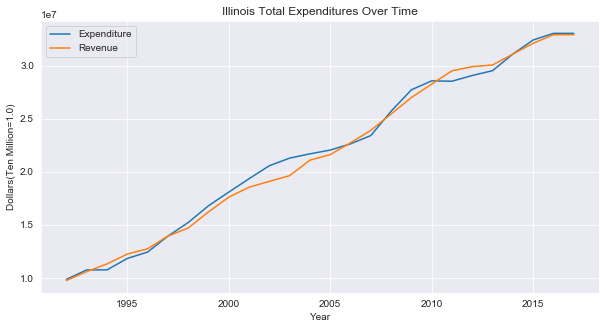

In [7]:
sns.set_style('darkgrid')

illinois= education.loc[education['STATE'] == 'ILLINOIS']

plt.figure(figsize=(10, 5))

plt.plot('YEAR', 'TOTAL_EXPENDITURE', data=illinois, label='Expenditure')
plt.plot('YEAR', 'TOTAL_REVENUE', data=illinois, label='Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars(Ten Million=1.0)')
plt.title('Illinois Total Expenditures Over Time')
plt.legend()

plt.show()

Illinois has had a very steady growth of expenditures and revenues over time, with the largest discrepancy being in 2002 that created a large deficit. Since then, Illinois changed policy allowing state deficits to be carried forward, so taxpayers could shoulder the cost in following years and reduce the immediate impact of the deficit.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [8]:
#Find total changes in math and reading scores

print('4th grade math average score: {}'.format(illinois['AVG_MATH_4_SCORE'].mean()))
print('8th grade math average score: {}'.format(illinois['AVG_MATH_8_SCORE'].mean()))
print('4th grade reading average score: {}'.format(illinois['AVG_READING_4_SCORE'].mean()))
print('4th grade reading average score: {}'.format(illinois['AVG_READING_8_SCORE'].mean()))

4th grade math average score: 235.52124832325177
8th grade math average score: 280.7091820818128
4th grade reading average score: 218.9540559494535
4th grade reading average score: 261.49488414174044


In [9]:
#Calculate overall difference in lessons over 4 years
print('Difference in math scores: {}'.format(illinois['AVG_MATH_8_SCORE'].mean()-illinois['AVG_MATH_4_SCORE'].mean()))
print('Difference in reading scores: {}'.format(illinois['AVG_READING_8_SCORE'].mean()-illinois['AVG_READING_4_SCORE'].mean()))

Difference in math scores: 45.18793375856103
Difference in reading scores: 42.54082819228694


The math scores are much higher in both groups than reading, but the change between 4th and 8th grade scores in both math and reading is nearly equivalent. 

4. What are the distributions of the math and reading scores in the sample?

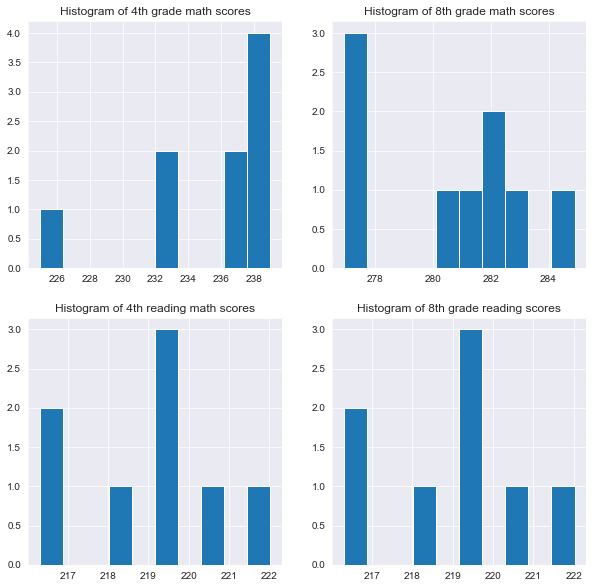

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(illinois['AVG_MATH_4_SCORE'])
plt.title('Histogram of 4th grade math scores')

plt.subplot(2, 2, 2)
plt.hist(illinois['AVG_MATH_8_SCORE'])
plt.title('Histogram of 8th grade math scores')

plt.subplot(2, 2, 3)
plt.hist(illinois['AVG_READING_4_SCORE'])
plt.title('Histogram of 4th reading math scores')

plt.subplot(2, 2, 4)
plt.hist(illinois['AVG_READING_4_SCORE'])
plt.title('Histogram of 8th grade reading scores')

plt.show()

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [11]:
illinois

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
13,1992_ILLINOIS,ILLINOIS,1992,274849.0,9748650.0,597077.0,3073178.0,6078395.0,9850560.0,5010400.0,...,133120.0,134317.0,106475.0,1111167.0,495562.0,1646411.0,NaN,NaN,NaN,NaN
65,1993_ILLINOIS,ILLINOIS,1993,1856841.0,10584624.0,632724.0,3467071.0,6484829.0,10744695.0,5520683.0,...,138827.0,138518.0,106519.0,1114636.0,503024.0,1660019.0,NaN,NaN,NaN,NaN
118,1994_ILLINOIS,ILLINOIS,1994,1875956.0,11309803.0,628532.0,3697747.0,6983524.0,10743708.0,5727974.0,...,143030.0,135134.0,109360.0,1123470.0,513525.0,1679933.0,NaN,NaN,NaN,NaN
170,1995_ILLINOIS,ILLINOIS,1995,1897161.0,12236673.0,686758.0,4100518.0,7449397.0,11821661.0,6031588.0,...,142660.0,132678.0,107244.0,1136499.0,518032.0,1700478.0,NaN,NaN,NaN,NaN
222,1996_ILLINOIS,ILLINOIS,1996,1924970.0,12732129.0,728400.0,4191483.0,7812246.0,12423100.0,6303563.0,...,145919.0,141348.0,123783.0,1206546.0,559275.0,1816678.0,NaN,NaN,NaN,253.212952
273,1997_ILLINOIS,ILLINOIS,1997,1952892.0,13929105.0,847818.0,4532935.0,8548352.0,13920593.0,6881301.0,...,146478.0,145853.0,129084.0,1225615.0,558129.0,1839579.0,NaN,NaN,NaN,NaN
325,1998_ILLINOIS,ILLINOIS,1998,1972406.0,14688777.0,962367.0,4807076.0,8919334.0,15207067.0,7391186.0,...,152841.0,148529.0,127506.0,1238890.0,558505.0,1856784.0,NaN,NaN,NaN,NaN
377,1999_ILLINOIS,ILLINOIS,1999,1987427.0,16208970.0,1089732.0,5665008.0,9454230.0,16783840.0,8205446.0,...,158444.0,149397.0,126984.0,1251482.0,563940.0,1874026.0,NaN,NaN,NaN,NaN
429,2000_ILLINOIS,ILLINOIS,2000,2003839.0,17595047.0,1283052.0,6344130.0,9967865.0,18073190.0,8738312.0,...,160495.0,149045.0,124760.0,1263029.0,573246.0,1896987.0,224.930411,276.909459,NaN,NaN
482,2001_ILLINOIS,ILLINOIS,2001,2025249.0,18534372.0,1411096.0,6637462.0,10485814.0,19337580.0,9317202.0,...,159038.0,151737.0,131411.0,1275481.0,585396.0,1918427.0,NaN,NaN,NaN,NaN


In [12]:
new_fill_list= ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
#interpolate what we can in the middle
for col in new_fill_list:
    illinois.loc[:, col].interpolate(inplace=True)
#Fill beginning and ending values with column means
age_array = illinois[illinois[new_fill_list]!=np.nan][new_fill_list]

illinois= illinois[new_fill_list].replace(np.nan,illinois[new_fill_list].mean())
illinois

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
13,235.375077,280.585351,218.995320,261.206475
65,235.375077,280.585351,218.995320,261.206475
118,235.375077,280.585351,218.995320,261.206475
170,235.375077,280.585351,218.995320,261.206475
222,235.375077,280.585351,218.995320,253.212952
273,235.375077,280.585351,218.995320,255.213684
325,235.375077,280.585351,218.995320,257.214416
377,235.375077,280.585351,218.995320,259.215148
429,224.930411,276.909459,218.995320,261.215880
482,227.572533,276.993000,218.995320,263.216611


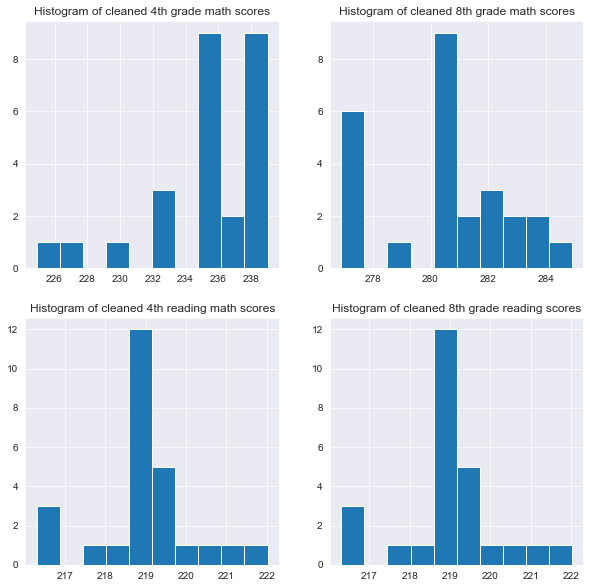

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(illinois['AVG_MATH_4_SCORE'])
plt.title('Histogram of cleaned 4th grade math scores')

plt.subplot(2, 2, 2)
plt.hist(illinois['AVG_MATH_8_SCORE'])
plt.title('Histogram of cleaned 8th grade math scores')

plt.subplot(2, 2, 3)
plt.hist(illinois['AVG_READING_4_SCORE'])
plt.title('Histogram of cleaned 4th reading math scores')

plt.subplot(2, 2, 4)
plt.hist(illinois['AVG_READING_4_SCORE'])
plt.title('Histogram of cleaned 8th grade reading scores')

plt.show()

The updated histograms show a much higher concentration of centrally located values, since most values replaced were the mean and the rest were interpolated close to the mean.